<a href="https://colab.research.google.com/github/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/blob/main/C%C3%B3digo_2_80_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Entrenamiento%20con%2080.csv')

In [ ]:
print(df)

        v    RH    u  N     PA     CW   No
0    14.5  68.6  0.7  2  884.0  0.042  122
1    20.9  48.6  0.6  0  883.4  0.000  130
2    18.4  54.0  0.6  0  887.1  0.028  102
3    14.8  41.4  0.7  8  890.0  0.014  155
4     6.1  96.4  1.0  7  888.7  0.028  183
..    ...   ...  ... ..    ...    ...  ...
146  12.3  53.7  0.8  0  886.8  0.000   81
147  17.5  67.0  0.7  0  883.7  0.056  132
148  13.3  66.5  0.9  0  889.0  0.083   50
149  12.6  67.7  0.8  0  886.8  0.014  158
150  19.4  29.1  0.7  0  885.9  0.000   43

[151 rows x 7 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[1.450e+01 6.860e+01 7.000e-01 ... 8.840e+02 4.200e-02 1.220e+02]
 [2.090e+01 4.860e+01 6.000e-01 ... 8.834e+02 0.000e+00 1.300e+02]
 [1.840e+01 5.400e+01 6.000e-01 ... 8.871e+02 2.800e-02 1.020e+02]
 ...
 [1.330e+01 6.650e+01 9.000e-01 ... 8.890e+02 8.300e-02 5.000e+01]
 [1.260e+01 6.770e+01 8.000e-01 ... 8.868e+02 1.400e-02 1.580e+02]
 [1.940e+01 2.910e+01 7.000e-01 ... 8.859e+02 0.000e+00 4.300e+01]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,0:5]
Y=dataset[:,5]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02]
 [1.480e+01 4.140e+01 7.000e-01 8.000e+00 8.900e+02]
 [6.100e+00 9.640e+01 1.000e+00 7.000e+00 8.887e+02]
 [1.730e+01 6.300e+01 9.000e-01 0.000e+00 8.852e+02]
 [1.670e+01 4.390e+01 7.000e-01 0.000e+00 8.888e+02]
 [1.900e+01 4.540e+01 8.000e-01 0.000e+00 8.841e+02]
 [1.740e+01 2.760e+01 1.000e+00 0.000e+00 8.879e+02]
 [7.200e+00 7.940e+01 1.500e+00 2.000e+00 8.900e+02]
 [7.100e+00 8.610e+01 1.300e+00 8.000e+00 8.882e+02]
 [1.520e+01 6.450e+01 9.000e-01 2.000e+00 8.850e+02]
 [1.430e+01 6.190e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.260e+01 7.950e+01 9.000e-01 2.000e+00 8.864e+02]
 [1.670e+01 6.650e+01 9.000e-01 0.000e+00 8.859e+02]
 [1.490e+01 3.460e+01 8.000e-01 6.000e+00 8.874e+02]
 [6.600e+00 8.180e+01 1.400e+00 0.000e+00 8.926e+02]
 [1.630e+01 5.780e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.230e+01 3.860e+01 1.200e+00 2.000e+00 8.90

In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.042 0.    0.028 0.014 0.028 0.056 0.    0.042 0.056 0.222 0.111 0.028
 0.    0.222 0.028 0.    0.333 0.056 0.    0.111 0.222 0.042 0.167 0.
 0.125 0.    0.056 0.028 0.    0.    0.056 0.125 0.    0.056 0.    0.028
 0.083 0.    0.014 0.028 0.167 0.028 0.    0.    0.014 0.178 0.    0.014
 0.    0.028 0.083 0.056 0.417 0.167 0.083 0.028 0.    0.167 0.    0.
 0.167 0.    0.056 0.    0.    0.111 0.083 0.    0.167 0.222 0.042 0.056
 0.056 0.278 0.028 0.014 0.056 0.    0.    0.    0.    0.    0.042 0.022
 0.056 0.    0.    0.125 0.    0.153 0.056 0.056 0.    0.    0.    0.
 0.042 0.    0.014 0.083 0.056 0.278 0.222 0.    0.028 0.056 0.056 0.
 0.    0.028 0.111 0.    0.    0.    0.    0.028 0.167 0.222 0.25  0.014
 0.014 0.222 0.    0.    0.    0.    0.056 0.    0.042 0.    0.028 0.
 0.014 0.    0.056 0.    0.    0.    0.    0.    0.056 0.    0.    0.167
 0.111 0.083 0.    0.056 0.083 0.014 0.   ]


# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=12,verbose=2)

Epoch 1/12
5/5 - 1s - loss: 681.6409 - mae: 21.3437 - mse: 681.6409
Epoch 2/12
5/5 - 0s - loss: 2.3095 - mae: 1.2681 - mse: 2.3095
Epoch 3/12
5/5 - 0s - loss: 1.4449 - mae: 0.9814 - mse: 1.4449
Epoch 4/12
5/5 - 0s - loss: 6.2223 - mae: 1.8868 - mse: 6.2223
Epoch 5/12
5/5 - 0s - loss: 422.4116 - mae: 19.4547 - mse: 422.4116
Epoch 6/12
5/5 - 0s - loss: 25.0030 - mae: 4.5641 - mse: 25.0030
Epoch 7/12
5/5 - 0s - loss: 34.3820 - mae: 5.4955 - mse: 34.3820
Epoch 8/12
5/5 - 0s - loss: 247.8661 - mae: 15.5576 - mse: 247.8661
Epoch 9/12
5/5 - 0s - loss: 70.1321 - mae: 8.1691 - mse: 70.1321
Epoch 10/12
5/5 - 0s - loss: 117.1120 - mae: 10.6218 - mse: 117.1120
Epoch 11/12
5/5 - 0s - loss: 153.6385 - mae: 12.3154 - mse: 153.6385
Epoch 12/12
5/5 - 0s - loss: 103.2434 - mae: 10.1020 - mse: 103.2434


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-chaibhpu
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-chaibhpu
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.047a807024a49d648ff635434d49e3f03a8cfc57a_-cp37-none-any.whl size=154244 sha256=5ca7f1bfd461fef5348aa31beebba4712354f28485eca33d920038ec96395a9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-09o6hixe/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 8500

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:125.9928,  mae:11.1584,  mse:125.9928,  
....................................................................................................
Epoch: 100, loss:49.0137,  mae:6.9837,  mse:49.0137,  
....................................................................................................
Epoch: 200, loss:34.9085,  mae:5.8151,  mse:34.9085,  
....................................................................................................
Epoch: 300, loss:13.2156,  mae:3.6303,  mse:13.2156,  
....................................................................................................
Epoch: 400, loss:7.1104,  mae:2.6645,  mse:7.1104,  
....................................................................................................
Epoch: 500, loss:2.8023,  mae:1.6569,  mse:2.8023,  
....................................................................................................
Epoch: 600, loss:1.5544,  mae:1.2341,  mse:1.5544,  
.............

## **Gráfica Valores Reales V/s Predicción**

0.6265681734861444

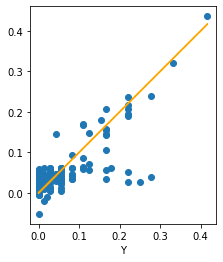

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict90.csv", prediction, delimiter=",")

[[ 0.04533041]
 [ 0.02141406]
 [ 0.0654847 ]
 [ 0.03774963]
 [ 0.03498003]
 [ 0.02985543]
 [ 0.0495291 ]
 [ 0.05866455]
 [ 0.02862909]
 [ 0.2053789 ]
 [ 0.11403702]
 [ 0.07852563]
 [-0.02185245]
 [ 0.18047458]
 [ 0.02915027]
 [ 0.02735967]
 [ 0.28125215]
 [ 0.04031117]
 [ 0.0306842 ]
 [ 0.14956948]
 [ 0.2053182 ]
 [ 0.02793143]
 [ 0.16015992]
 [ 0.04480141]
 [ 0.03837179]
 [ 0.02411992]
 [ 0.02248638]
 [ 0.05417537]
 [ 0.01017709]
 [ 0.01580456]
 [ 0.0468517 ]
 [ 0.10928065]
 [ 0.02410809]
 [ 0.01886649]
 [ 0.0486101 ]
 [ 0.04492322]
 [ 0.0893271 ]
 [ 0.01508125]
 [ 0.02366882]
 [ 0.07780568]
 [ 0.16631609]
 [ 0.04163215]
 [ 0.01253293]
 [ 0.01530358]
 [ 0.02473073]
 [ 0.10892062]
 [ 0.02123373]
 [ 0.05670387]
 [ 0.04895429]
 [ 0.02765857]
 [ 0.05278462]
 [ 0.07707457]
 [ 0.42980954]
 [ 0.11631952]
 [ 0.07159649]
 [ 0.03416077]
 [ 0.00215048]
 [ 0.06650187]
 [ 0.02485181]
 [ 0.05161443]
 [ 0.08129392]
 [ 0.02400452]
 [ 0.02646802]
 [ 0.05290887]
 [ 0.00840581]
 [ 0.05410819]
 [ 0.00368

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Testeo%20con%2020%20sin.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,0:5]
Ytest=dataset2[:,5]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.05976118983398434


0.005648511911597653

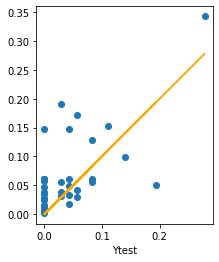

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict10.csv", predict, delimiter=",")

[[0.06058176]
 [0.06058176]
 [0.03878389]
 [0.09888619]
 [0.04942795]
 [0.00946927]
 [0.04765309]
 [0.03419031]
 [0.15224636]
 [0.01714503]
 [0.05757141]
 [0.06058176]
 [0.03729872]
 [0.06099526]
 [0.1718714 ]
 [0.00093374]
 [0.05576828]
 [0.02828956]
 [0.05535099]
 [0.3432062 ]
 [0.01191533]
 [0.02930102]
 [0.04703512]
 [0.01468132]
 [0.02337419]
 [0.00739754]
 [0.04203824]
 [0.12875518]
 [0.00766987]
 [0.14773728]
 [0.190156  ]
 [0.01378102]
 [0.06058176]
 [0.14760774]
 [0.03329078]
 [0.03176121]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sección nueva